In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score

In [7]:
df=pd.read_csv('/Users/kevinc/Library/Mobile Documents/com~apple~CloudDocs/Data Science/F21DL Data Mining Machine Learning/F21SC CW/datascience.csv')

In [8]:
Location_US= df["company_location"]=="US"
df["Location"]=Location_US
df.drop(['company_location'], axis=1)
df.drop(columns=df.columns[0],axis=1,inplace=True)
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Location
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,False
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,False
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,False
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,False
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,True
...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,True
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,True
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,True
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M,True


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
df['work_year']=le.fit_transform(df['work_year'])
df['Location']=le.fit_transform(df['Location'])
df['employee_residence']=le.fit_transform(df['employee_residence'])
df['salary_currency']=le.fit_transform(df['salary_currency'])
df['employment_type']=le.fit_transform(df['employment_type'])
df['experience_level']=le.fit_transform(df['experience_level'])
df['job_title']=le.fit_transform(df['job_title'])
df['company_location']=le.fit_transform(df['company_location'])
df['company_size']=le.fit_transform(df['company_size'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   work_year           607 non-null    int64
 1   experience_level    607 non-null    int64
 2   employment_type     607 non-null    int64
 3   job_title           607 non-null    int64
 4   salary              607 non-null    int64
 5   salary_currency     607 non-null    int64
 6   salary_in_usd       607 non-null    int64
 7   employee_residence  607 non-null    int64
 8   remote_ratio        607 non-null    int64
 9   company_location    607 non-null    int64
 10  company_size        607 non-null    int64
 11  Location            607 non-null    int64
dtypes: int64(12)
memory usage: 57.0 KB


In [11]:

df1=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio","company_size","salary","employment_type", "job_title"  ]]
df2=df[["Location","employee_residence","salary_currency","salary_in_usd","experience_level", "remote_ratio"]]
df3=df[["Location","employee_residence","salary_currency","salary_in_usd"]]

In [12]:
X=df.drop(['Location'],axis=1)
Y=df['Location']

In [13]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

<h1>Random  Forest Classifier</h1>

In [14]:
clf= RandomForestClassifier(max_depth=7,random_state=0)
clf.fit(X_train,y_train)
res_pred=clf.predict(X_train)
accuracy_score(y_train, res_pred)

1.0

In [15]:
cross_val_score(clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.99295775, 1.        , 1.        ])

<h1>Nearest Neigbors</h1>

In [16]:

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print ("KNN ",accuracy_score(y_test,knn_pred))

KNN  0.8797814207650273


In [17]:
cross_val_score(knn,X_train,y_train,cv=3,scoring="accuracy")

array([0.84507042, 0.86524823, 0.87234043])

<AxesSubplot:>

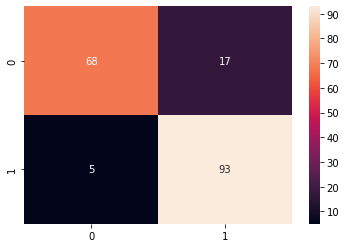

In [18]:
sns.heatmap(confusion_matrix(y_test,knn_pred), annot=True)

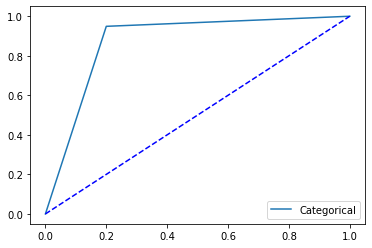

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, knn_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [20]:
cm = confusion_matrix(y_test, knn_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(knn_pred, y_test))
print('recall = ', recall_score(knn_pred, y_test))
auc = roc_auc_score(y_test, knn_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
68 17 5 93
sensitivity = 0.422360248447205
specificity = 0.22727272727272727
precision = 0.9489795918367347
recall =  0.8454545454545455
AUC: 0.874


<h1>Multinomial</h1>

In [21]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb_pred=mnb.predict(X_test)
print ("Multinomial ",accuracy_score(y_test,mnb_pred))

Multinomial  0.6229508196721312


<AxesSubplot:>

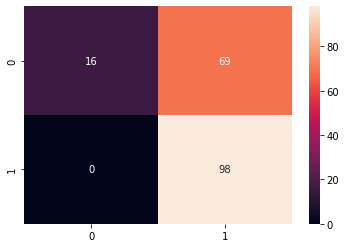

In [22]:
sns.heatmap(confusion_matrix(y_test,mnb_pred), annot=True)

In [23]:
cross_val_score(mnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.64788732, 0.67375887, 0.65957447])

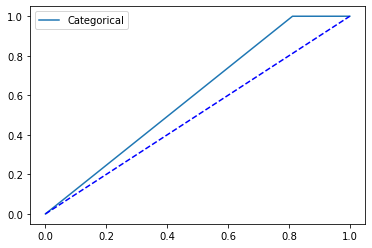

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, mnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [25]:
cm = confusion_matrix(y_test, mnb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(mnb_pred, y_test))
print('recall = ', recall_score(mnb_pred, y_test))
auc = roc_auc_score(y_test, mnb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
16 69 0 98
sensitivity = 0.14035087719298245
specificity = 0.0
precision = 1.0
recall =  0.5868263473053892
AUC: 0.594


<h1>Gaussian</h1>

In [26]:
gnb=GaussianNB()  
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
print ("Guassian ",accuracy_score(y_test,gnb_pred))

Guassian  0.6502732240437158


<AxesSubplot:>

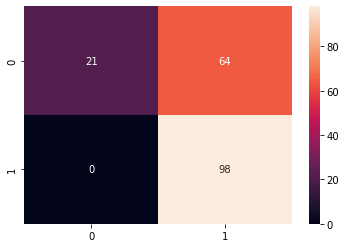

In [27]:
sns.heatmap(confusion_matrix(y_test,gnb_pred), annot=True)

In [28]:
cross_val_score(gnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.63380282, 0.92198582, 0.66666667])

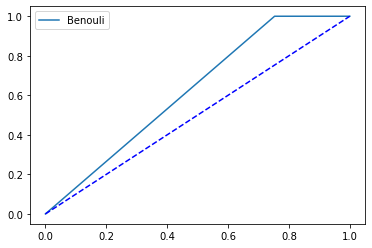

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, gnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Benouli' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

<h1>Complement</h1>

In [ ]:
cnb=ComplementNB()  
cnb.fit(X_train,y_train)
cnb_pred = cnb.predict(X_test)
print ("Complement ",accuracy_score(y_test,cnb_pred))

Complement  0.6229508196721312


<AxesSubplot:>

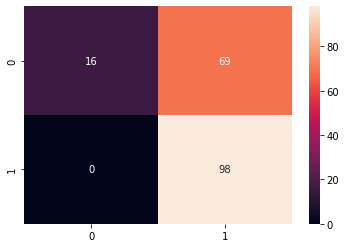

In [ ]:
sns.heatmap(confusion_matrix(y_test,cnb_pred), annot=True)

In [ ]:
cross_val_score(cnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.64788732, 0.67375887, 0.65957447])

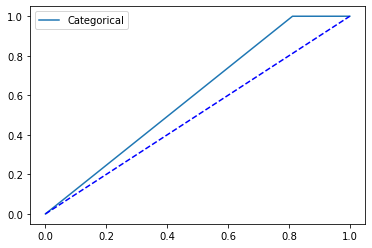

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, cnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Categorical' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, cnb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(cnb_pred, y_test))
print('recall = ', recall_score(cnb_pred, y_test))
auc = roc_auc_score(y_test, cnb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
16 69 0 98
sensitivity = 0.14035087719298245
specificity = 0.0
precision = 1.0
recall =  0.5868263473053892
AUC: 0.594


<h1>Bernoulli</h1>

In [ ]:
bnb=BernoulliNB(binarize=True)  
bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)
print ("Bernoulli ",accuracy_score(y_test,bnb_pred))

Bernoulli  0.6338797814207651


<AxesSubplot:>

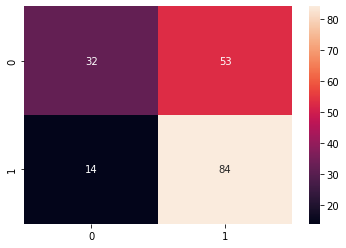

In [ ]:
sns.heatmap(confusion_matrix(y_test,bnb_pred), annot=True)

In [ ]:
cross_val_score(bnb,X_train,y_train,cv=3,scoring="accuracy")

array([0.66197183, 0.63829787, 0.60283688])

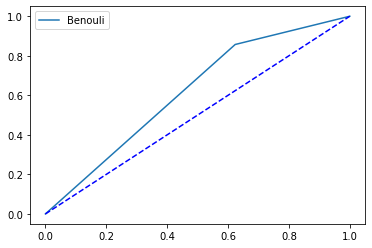

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, bnb_pred)
random_probs = [0 for i in range(len(y_test))]
a, b, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr,tpr, label='Benouli' )
plt.plot(a,b,linestyle='--', color='blue')
plt.legend(loc='best')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, bnb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(bnb_pred, y_test))
print('recall = ', recall_score(bnb_pred, y_test))
auc = roc_auc_score(y_test, bnb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
32 53 14 84
sensitivity = 0.27586206896551724
specificity = 0.208955223880597
precision = 0.8571428571428571
recall =  0.6131386861313869
AUC: 0.617


<h1>Categorical</h1>

In [ ]:
canb=CategoricalNB()  
canb.fit(X_train,y_train)
canb_pred = gnb.predict(X_test)
print ("Categorical ",accuracy_score(y_test,canb_pred))

Categorical  0.6502732240437158


<AxesSubplot:>

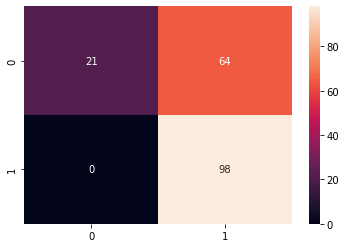

In [ ]:
sns.heatmap(confusion_matrix(y_test,canb_pred), annot=True)

In [ ]:
cross_val_score(canb,X_train,y_train,cv=3,scoring="accuracy")

In [ ]:
cm = confusion_matrix(y_test, canb_pred)
tp, fp, fn, tn = cm[0,0], cm[0,1], cm[1,1], cm[1,0]
print('tp', 'fp', 'tn', 'fn')
print(tp, fp, tn, fn)

print('sensitivity =' ,(tp/(tp+fn)))
print('specificity =' ,(tn / (tn+fp)))
print('precision =' ,precision_score(canb_pred, y_test))
print('recall = ', recall_score(canb_pred, y_test))
auc = roc_auc_score(y_test, canb_pred)
print('AUC: %.3f' % auc)

tp fp tn fn
21 64 0 98
sensitivity = 0.17647058823529413
specificity = 0.0
precision = 1.0
recall =  0.6049382716049383
AUC: 0.624


In [ ]:
X=df['Location']
Y=df['Location']

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size=0.3, random_state=20)